In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("dark")

import nltk
import re

df = pd.read_csv('../data/lyrics.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             2024 non-null   object 
 1   id                2024 non-null   object 
 2   track             2024 non-null   object 
 3   artist            2024 non-null   object 
 4   album             2024 non-null   object 
 5   release_date      2024 non-null   object 
 6   release_year      2024 non-null   int64  
 7   length_ms         2024 non-null   int64  
 8   explicit          2024 non-null   bool   
 9   popularity        2024 non-null   int64  
 10  danceability      2024 non-null   float64
 11  energy            2024 non-null   float64
 12  key               2024 non-null   int64  
 13  loudness          2024 non-null   float64
 14  mode              2024 non-null   int64  
 15  speechiness       2024 non-null   float64
 16  acousticness      2024 non-null   float64


In [3]:
df.head()

,genre,id,track,artist,album,release_date,release_year,length_ms,explicit,popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,lyrics_text,song_sections
0,pop,1V6gIisPpYqgFeWbMLI0bA,Heart Attack,['Demi Lovato'],Demi,2013-01-01,2013,210840,False,85,...,1,0.1040,0.0738,0.000000,0.2390,0.502,173.968,104 ContributorsTranslationsTiếng ViệtFrançais...,Puttin' my defenses up\n'Cause I don't wanna f...,"['Chorus', 'PreChorus', 'Verse', 'Intro', 'Bri..."
1,pop,0K6iKgHPPhAb4Acmg9aD77,On My Love,"['Zara Larsson', 'David Guetta']",On My Love (Sped Up),2023-09-12,2023,222911,False,76,...,0,0.0460,0.0724,0.002900,0.0881,0.316,123.069,21 ContributorsTranslationsDeutschEspañolOn My...,(That's on my love)\n(That's on my love)\n\nNo...,"['Chorus', 'PreChorus', 'Verse', 'Intro', 'Drop']"
2,pop,0HPD5WQqrq7wPWR7P7Dw1i,TiK ToK,['Kesha'],Animal (Expanded Edition),2010-01-01,2010,199693,False,86,...,0,0.1420,0.0991,0.000000,0.2890,0.714,120.028,111 ContributorsTranslationsPortuguêsHrvatskiT...,Wake up in the morning feelin' like P. Diddy (...,"['Chorus', 'Break', 'PreChorus', 'Verse', 'Bri..."
3,pop,7DSAEUvxU8FajXtRloy8M0,Flowers,['Miley Cyrus'],Endless Summer Vacation,2023-08-18,2023,200600,False,94,...,1,0.0633,0.0584,0.000070,0.0232,0.632,118.048,98 ContributorsTranslationsEspañolPortuguêsKis...,"We were good, we were gold\nKinda dream that c...","['Chorus', 'PreChorus', 'PostChorus', 'Verse',..."
4,pop,6FZDfxM3a3UCqtzo5pxSLZ,Without Me,['Halsey'],Manic,2020-01-17,2020,201660,True,84,...,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,220 ContributorsTranslationsTürkçeEspañolPortu...,Found you when your heart was broke\nI filled ...,"['Bridge', 'PreChorus', 'Chorus', 'Verse']"


In [4]:
df['genre'] = df['genre'].str.title()
df['genre'].value_counts(normalize=True)*100

Rock       31.126482
Pop        25.444664
Country    24.407115
Hip Hop    19.021739
Name: genre, dtype: float64

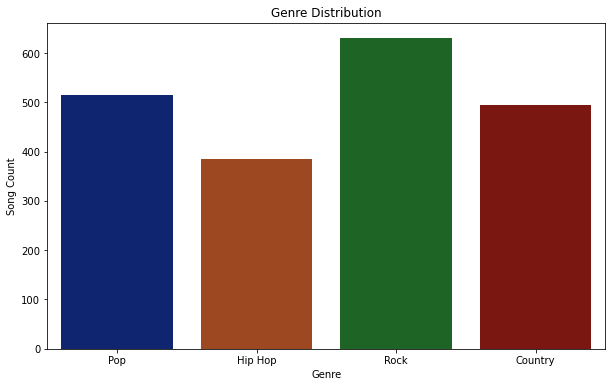

In [5]:
# visualize genre counts
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Song Count');


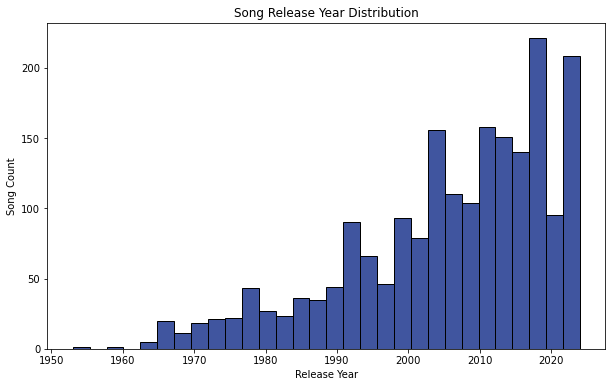

In [6]:
# visualize song count by release year
plt.figure(figsize=(10, 6))
sns.histplot(x='release_year', data=df, bins=30)
plt.title('Song Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Song Count');

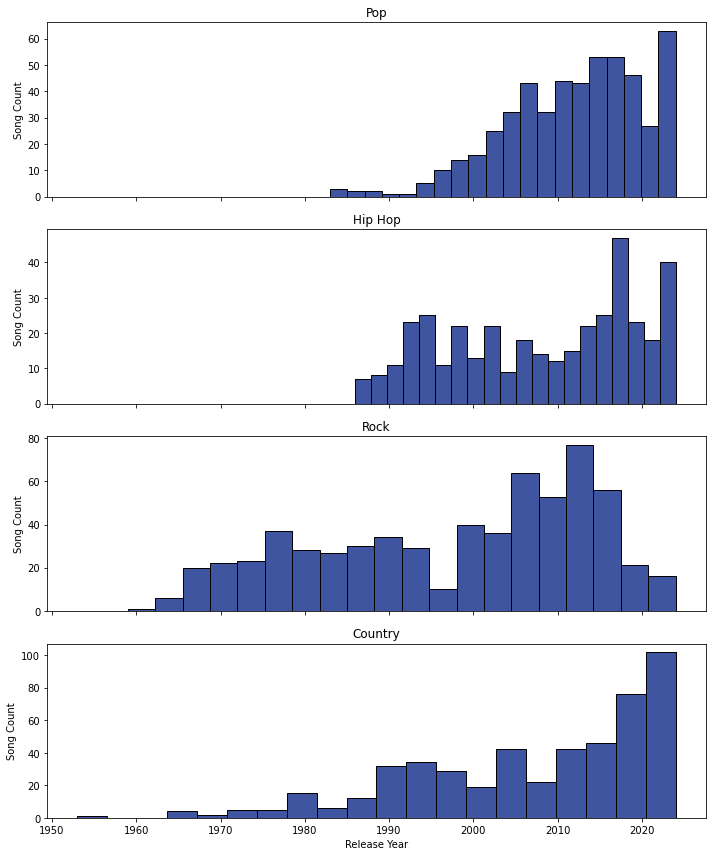

In [7]:
# break out release year by genre
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
genres = df['genre'].unique()
for i, genre in enumerate(genres):
    sns.histplot(x='release_year', data=df[df['genre']==genre], bins=20, ax=axes[i])
    axes[i].set_title(genre)
    axes[i].set_xlabel('Release Year')
    axes[i].set_ylabel('Song Count')
plt.tight_layout();

<Figure size 864x576 with 0 Axes>

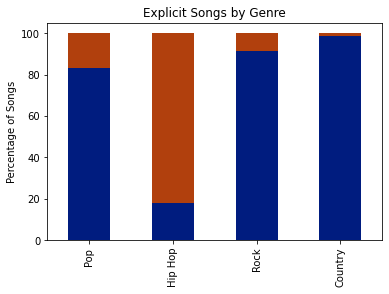

In [11]:
# explicit songs by genre - calculate percentage
df_explicit = (df.groupby('genre')['explicit']
               .value_counts(normalize=True).unstack()
               .loc[['Pop', 'Hip Hop', 'Rock', 'Country']]*100)

plt.figure(figsize=(12, 8))
df_explicit.plot(kind='bar', stacked=True, legend=False)
plt.title('Explicit Songs by Genre')
plt.xlabel(None)
plt.ylabel('Percentage of Songs');

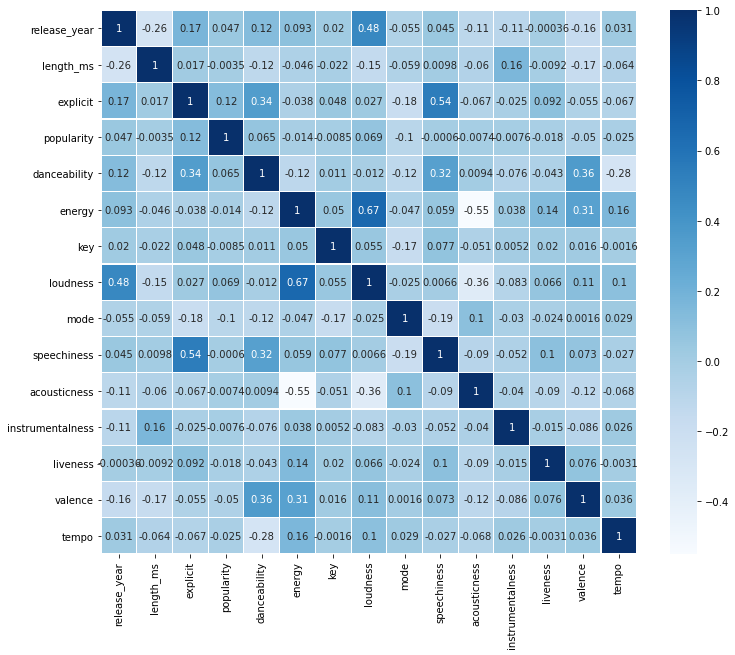

In [12]:
# correlation for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.1);